# Pandas

판다스는 CSV 데이터를 처리할 수 있는 모듈이다.

판다스는 데이터 저장을 위하여 다음과 같은 2가지 데이터 구조를 제공한다.

1. 시리즈 - 레이블이 붙어 있는 1차원 벡터

2. 데이터프레임 - 행과 열로 되어있는 2차원 테이블, 각 열은 시리즈로 되어 있다.

이들 데이터 구조는 모두 넘파이 배열을 이용하여 구현된다. 따라서 속도가 빠르다. 모든 데이터 구조는 값을 변경할 수 있으며, 시리즈를 제외하고는 크기도 변경할 수 있다. 각 행과 열은 이름이 부여되며, 행의 이름을 인덱스(index), 열의 이름을 컬럼스(columns)라 부른다.

#### 시리즈

시리즈는 동일한 유형의 데이터를 저장하는 1차원 배열이다. 

판다스의 시리즈 데이터를 만드는 것은 Series 클래스를 이용한다. 이 클래스를 생성할 때 리스트를 넘겨주면 이 리스트를 이용하여 1차원 벡터 구조의 시리즈 데이터를 생성하게 된다(nan은 Not a Number(NaN)의 약어로 넘파이에서 수칙연산은 가능하지만 정의할 수 없는 값을 의미한다.)

In [5]:
import numpy as np
import pandas as pd
series = pd.Series([1,3,4, np.nan, 6,8])
series

0    1.0
1    3.0
2    4.0
3    NaN
4    6.0
5    8.0
dtype: float64

1차원 백터를 생성하였다. 이것이 판다스에서 사용하는 가장 기초적인 데이터 구조인 시리즈이다.

#### 데이터 프레임

데이터프레임은 시리즈 데이터가 여러 개 모여서 2차원적 구조를 갖는 것이다. 이 데이터프레임은 판다스가 데이터를 분석할 때 사용하는 기본적 틀이다. 예를 들면 다음과 같이, 레이블이 붙은 테이블이 데이터프레임이다.

하나의 데이터프레임은 행과 열로 구분할 수 있는데, 하나의 행은 여러 종류의 데이터를 담고 있다. 모든 행은 동일한 형태의 자료 배치를 가진다. 아래 예에서는 모든 행은 [이름, 나이, 성별, 평점]의 데이터를 가진다. 그리고 각 열은 동일한 자료형을 가진 시리즈 임을 알 수 있다.

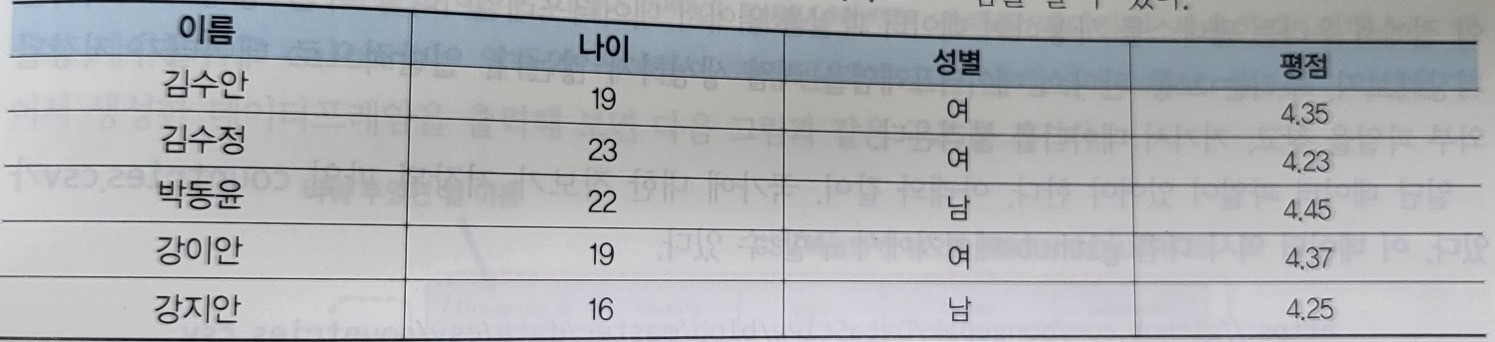

각각의 시리즈를 만들어보자.

In [6]:
name_series = pd.Series(['김수안', '김수정', '박동윤', '강이안', '강지안'])
age_series = pd.Series(['19', '23', '22', '19', '16'])
sex_series = pd.Series(['여', '여', '남', '여', '남'])
grade_series = pd.Series(['4.35', '4.23', '4.25', '4.37', '4.25'])
print(name_series, age_series, sex_series, grade_series)

0    김수안
1    김수정
2    박동윤
3    강이안
4    강지안
dtype: object 0    19
1    23
2    22
3    19
4    16
dtype: object 0    여
1    여
2    남
3    여
4    남
dtype: object 0    4.35
1    4.23
2    4.25
3    4.37
4    4.25
dtype: object


이 시리즈들을 모아 하나의 데이터프레임을 만들 수 있다. 이때는 판다스의 DataFrame 클래스를 사용한다. 이때 DataFrame을 생성하기 위한 인자로 시리즈들을 나열하면 되는데, 딕셔너리 구조를 입력을 한다. 딕셔너리의 키는 시리즈가 차지할 열의 이름, 값은 시리즈가 된다. 따라서 위의 네 시리즈를 이용한 데이터프레임 생성은 다음과 같다.

In [7]:
df = pd.DataFrame({'이름' : name_series, '나이' : age_series, '성별' : sex_series, '평점' : grade_series})
print(df)

    이름  나이 성별    평점
0  김수안  19  여  4.35
1  김수정  23  여  4.23
2  박동윤  22  남  4.25
3  강이안  19  여  4.37
4  강지안  16  남  4.25


### 판다스로 데이터 파일 읽기

판다스 모듈을 csv 파일을 읽어들여서 데이터프레임으로 바꾸는 작업을 간단히 할 수 있게 한다. 다음과 같이 read_csv 함수를 이용하면 된다. countries.csv 파일의 제1행 제1열은 비어 있음을 확인할 수 있다. 이것은 첫 열은 데이터가 아니라 각 행의 인덱스로 사용되도록 하기 위해서이다.

In [8]:
df = pd.read_csv('/content/countries.csv')

이때 CSV 파일이 데이터프레임이 될 수 있도록 각 행이 같은 구조로 되어 있고, 각 열은 동일한 자료형을 가진 시리즈로 되어 있어야 한다. 에러가 없이 csv 파일을 읽어왔다면 df를 출력해보자.

In [9]:
df

,Unnamed: 0,country,area,capital,population
0,KR,Korea,98480,Seoul,51780579
1,US,USA,9629091,Washington,331002825
2,JP,Japan,377835,Tokyo,125960000
3,CN,China,9596960,Beijing,1439323688
4,RU,Russia,17100000,Moscow,146748600


데이터프레임에서는 각 행들이 하나의 객체에 대한 정보를 표시한다. 위의 표에서는 각 행에 특정 국가의 정보를 표시한다. 각 열들은 서로 다른 속성을 나타낸다.  각 열은 레이블에 가지고 있다. 여기서는 국가명, 면적, 수도, 인구 등이 열의 레이블에 해당된다.

각 행의 인덱스는 0부터 정수가 자동으로 부여되어 있음을 알 수 있다. 그리고 비워 두었던 첫 열은 Unnamed:0 이름이 부여된 것을 확인할 수 있다.

우리가 첫 행의 첫 열 공간을 비워둔 것은 이 열에 나타나는 국가 코드를 인덱스로 사용하기 위한 것이다. 따라서 자동으로 0부터 정수를 매겨 인덱스로 쓰지 않고, 0번 열을 인덱스로 쓰라고 알려주면 좋을 것이다. 판다스의 read_csv 함수에 index_col 이라는 키워드 매개변수에 인자 0을 넘겨 주면 0 열이 인덱스로 사용된다.

In [10]:
df = pd.read_csv('/content/countries.csv', index_col = 0)
df

,country,area,capital,population
KR,Korea,98480,Seoul,51780579
US,USA,9629091,Washington,331002825
JP,Japan,377835,Tokyo,125960000
CN,China,9596960,Beijing,1439323688
RU,Russia,17100000,Moscow,146748600


### 열을 기준으로 데이터 선택하기

데이터프레임에서 특정한 열만 선택하려면 아래와 같이 대괄호 안에 열의 이름을 넣으면 된다. 다음 코드는 countries.csv를 다시 읽고 있다. 그리고 처음에는 인덱스를 첫 열로 지정해서 df_my_index로 할당했고, 인덱스 지정 없이 만든 데이터프레임은 df_no_index로 할당했다. 두 데이터프레임에서 population 레이블을 가진 열을 추출하기 위해서는 df['populattion']이라고 하면 된다.

In [11]:
df_1 = pd.read_csv('/content/countries.csv',index_col=0)
df_2 = pd.read_csv('/content/countries.csv')

print(df_1['population'])
print(df_2['population'])

KR      51780579
US     331002825
JP     125960000
CN    1439323688
RU     146748600
Name: population, dtype: int64
0      51780579
1     331002825
2     125960000
3    1439323688
4     146748600
Name: population, dtype: int64


주의해서 볼 점은 첫열을 인덱스로 지정한 경우와 그렇지 않은 경우의 차이이다. 국가 코드가 인덱스로 사용되기 때문에 특정 열의 데이터를 가져올 때에도 해당 데이터가 속한 행의 인덱스 정보인 국가 코드가 표시되고 있다.

아래와 같이 전체 중에서 2개의 열을 선택하려면 원하는 열들의 레이블을 리스트로 만들어서 전달하여야 한다.

In [12]:
print(df_1[['area','population']])

        area  population
KR     98480    51780579
US   9629091   331002825
JP    377835   125960000
CN   9596960  1439323688
RU  17100000   146748600


### 데이터 가시화 하기

우리는 선택한 열을 그래프로 그릴 수 있다. 이를 위하여 데이터프레임의 이름 다음에 plot() 메소드만 추가하면 된다. 각 국가의 인구만을 추출하여서 막대 그래프로 그려보면 다음과 같다.

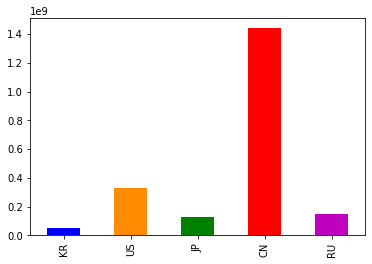

In [13]:
df['population'].plot(kind='bar', color=('b', 'darkorange', 'g', 'r', 'm'))

코드에서 plot 메소드의 키워드 매개변수 kind는 차트의 종류를 의미한다. 각각의 막대마다 색을 지정할 수 있는데, 튜플로 제공하면 된다. 위의 예에서는 파랑, 어두운 주황, 녹색, 빨강, 자홍색을 지정햇다. 어두운 주황을 제외하고는 자주 사용하는 색이라 첫 글자만으로도 표현할 수 있다.

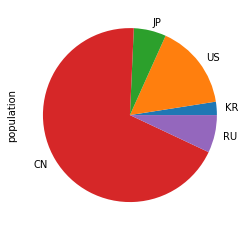

In [14]:
df['population'].plot(kind='pie')

### 판다스 슬라이싱

데이터프레임 중에서 몇 개의 행만을 가져오고자 할 때는 몇 가지의 방법이 있다. 우선 처음 5행만 얻으려면 head()를 사용할 수 있다. 마지막 5행만을 얻으려면 tail()을 사용한다.

In [15]:
df.head()

,country,area,capital,population
KR,Korea,98480,Seoul,51780579
US,USA,9629091,Washington,331002825
JP,Japan,377835,Tokyo,125960000
CN,China,9596960,Beijing,1439323688
RU,Russia,17100000,Moscow,146748600


여기서는 행의 개수가 5개 이하이어서 별 차이가 없지만 행의 개수가 아주 많은 경우에는 head()와 tail()이 도움이 된다. 더욱 일반적인 방법은 다음과 같이 슬라이싱 표기법을 사용하는 것이다.

In [16]:
df[:3]

,country,area,capital,population
KR,Korea,98480,Seoul,51780579
US,USA,9629091,Washington,331002825
JP,Japan,377835,Tokyo,125960000


만약 행의 레이블, 즉 인덱스를 사용하여 행을 선택하려면 특별한 메소드를 사용해야 한다. 왜냐하면 [레이블] 형태의 접근은 열을 선택하는데 사용되기 때문이다. 이때는 loc[인덱스]를 사용하면 된다. 예를 들어서 행의 레이블 'KR'인 행만을 선택하려면 df.loc를 써주고 대괄호 안에 접근하고 싶은 행의 레이블을 적어준다.

In [17]:
df.loc['KR']

country          Korea
area             98480
capital          Seoul
population    51780579
Name: KR, dtype: object

열 선택과 행 선택을 결합할 수도 있다. 예를 들어서 처음 3개 국가의 인구는 다음과 같다.

In [18]:
df['population'][:3]

KR     51780579
US    331002825
JP    125960000
Name: population, dtype: int64

countries_df[:3]['population']와 같이 다음과 같이 순서를 바꾸어도 그 결과는 동일하다. 만일 데이터프레임에서 특정한 요소 하나만을 선택하려면 loc 함수에 행과 열의 레이블을 써주면 된다.

In [19]:
df.loc['US']['capital']

'Washington'

다른 방법도 있다. 우선 해당 열을 선택하고 loc 함수로 행을 선택한다.

In [20]:
df.loc['US'].loc['capital']

'Washington'

거꾸로 써주는 것도 가능하다.

### 새로운 열 만들기

판다스를 이용하면 다른 열의 정보를 토대로 새로운 열을 생성할 수 있다. 우리의 데이터프레임에 인구 밀도를 나타내는 열을 생성해보자.

In [21]:
df['density'] = df['population'] / df['area']
df

,country,area,capital,population,density
KR,Korea,98480,Seoul,51780579,525.797918
US,USA,9629091,Washington,331002825,34.375293
JP,Japan,377835,Tokyo,125960000,333.373033
CN,China,9596960,Beijing,1439323688,149.977044
RU,Russia,17100000,Moscow,146748600,8.581789


새로운 열을 추가하려면 데이터프레임에 대괄호를 하고 새로운 열의 이름을 써주면 된다. 이제 데이터 프레임은 5개의 열을 가지게 되었다.

### 데이터 분석 기능

데이터 프레임이 저장한 데이터를 간단히 분석하려면 describe() 함수를 호출하면 된다.

In [23]:
weather_df = pd.read_csv('/content/weather.csv', index_col = 0, encoding ='CP949')
print(weather_df.describe())

              평균기온         최대풍속         평균풍속
count  3653.000000  3649.000000  3647.000000
mean     12.942102     7.911099     3.936441
std       8.538507     3.029862     1.888473
min      -9.000000     2.000000     0.200000
25%       5.400000     5.700000     2.500000
50%      13.800000     7.600000     3.600000
75%      20.100000     9.700000     5.000000
max      31.300000    26.000000    14.900000


평균값(mean), 표준편차(std), 최솟값(min), 최댓값(max) 기능을 사용할 수 있다.

In [24]:
weather_df.mean()
weather_df.std()

평균기온    8.538507
최대풍속    3.029862
평균풍속    1.888473
dtype: float64

### 데이터 집계 분석

데이터의 전체적인 특징이 어떠한지를 분석하는 것은 매우 중요한 일이다. 앞서 살펴본 describe() 함수는 데이터프레임의 데이터 특성을 전체적으로 요약해 주는데, 이 분석 내용 각각은 하나씩 떼어서 적용할 수도 있다.

In [25]:
weather_df.count()

평균기온    3653
최대풍속    3649
평균풍속    3647
dtype: int64

위를 보면 숫자 값이 다르다는 것을 볼 수 있다. 이는 결손 값이 있다는 것을 알 수 있다.

또한 원하는 열의 정보만을 뽑아내서 볼 수 있다.

In [26]:
weather_df['최대풍속'].count()

3649

In [27]:
weather_df[['최대풍속', '평균풍속']].count()

최대풍속    3649
평균풍속    3647
dtype: int64

count () 뿐만 아니라 다른 함수들, min(), max(), mean(), sum() 등도 적용가능하다.

In [28]:
weather_df[['최대풍속', '평균풍속']].sum()

최대풍속    28867.6
평균풍속    14356.2
dtype: float64

데이터프레임 다음에 분석을 위한 함수를 먼저 쓰고, 이후에 원하는 열을 표시하는 방식도 가능하다.

In [29]:
weather_df.sum()[['최대풍속', '평균풍속']]

최대풍속    28867.6
평균풍속    14356.2
dtype: float64

### 데이터를 특정한 값에 기반하여 묶는 기능 : 그룹핑

groupby() 함수를 이용하여 데이터프레임에 내용을 넣을 수 있다. groupby() 함수에 넘길 인자로는 우리가 그룹을 묶을 때에 사용될 열의 레이블이다. 해당 열에 있는 데이터가 동일하면 하나의 그룹으로 묶이는 것이다. 그리고 여기에 mean()을 적용하면 해당 그룹의 데이터들이 가진 값의 평균을 구할 수 있다.

In [30]:
weather = pd.read_csv('/content/weather.csv', encoding = 'CP949')

In [ ]:
weather['month'] = pd.DatetimeIndex(weather['일시']).month()
means = weather_df.groupby('month').mean()

print(means)

### 조건에 맞는 필터링

In [32]:
weather['최대풍속'] >= 10.0

0       False
1       False
2       False
3       False
4       False
        ...  
3648    False
3649    False
3650    False
3651    False
3652    False
Name: 최대풍속, Length: 3653, dtype: bool

참과 거짓을 판별하기는 했지만, 이것은 기존 데이터프레임의 인덱스를 이용하여 해당 조건을 만족하는 경우에는 참, 그렇지 않은 경우에 거짓을 표시하고 있을 뿐이다. 참이 되는 값만 추출하고 싶을 때 적합한 방식은 아니다.

특정 조건을 만족하는 데이터만을 추출하는 방식은 아래와 같다.

In [33]:
weather[weather['최대풍속'] >= 10.0]   

,일시,평균기온,최대풍속,평균풍속
9,2010-08-10,25.6,10.2,5.5
12,2010-08-13,24.3,10.9,4.6
13,2010-08-14,25.0,10.8,4.4
14,2010-08-15,24.5,16.9,10.3
29,2010-08-30,26.2,10.5,6.2
...,...,...,...,...
3622,2020-07-01,16.8,19.7,8.7
3632,2020-07-11,20.1,10.3,4.1
3634,2020-07-13,17.8,10.3,4.6
3635,2020-07-14,17.8,12.7,9.4


### 빠진 값을 찾고 삭제하기

판다스에서는 결손값을 NaN으로 나타낸다. 판다스는 결손값을 타미하고 수정하는 함수를 제공한다.

In [34]:
weather['평균풍속'].isna()

0       False
1       False
2       False
3       False
4       False
        ...  
3648    False
3649    False
3650    False
3651    False
3652    False
Name: 평균풍속, Length: 3653, dtype: bool

In [35]:
weather[weather['평균풍속'].isna()]

,일시,평균기온,최대풍속,평균풍속
559,2012-02-11,-0.7,NaN,NaN
560,2012-02-12,0.4,NaN,NaN
561,2012-02-13,4.0,NaN,NaN
1694,2015-03-22,10.1,11.6,NaN
1704,2015-04-01,7.3,12.1,NaN
3182,2019-04-18,15.7,11.7,NaN


위와 같이 입력하면 null 값이 있는 항목을 볼 수가 있다.

결손값을  다루는 가장 간단한 방법은 결손값을 가진 행이나 열을 삭제하는 것이다. 판다스에서는 dropna() 함수를 이용하여 삭제할 수 있다.

    pandas.DataFrame.dropna(axis = 0, how='any', inplace = False)

axis가 0이면, 결손 데이터를 포함한 행을 삭제, 1이면 결손데이터를 포함한 열을 삭제

how의 값이 'any'이면 결손 데이터가 하나라도 포함되면 제거 대상이 되고, 'all'이면 axis 인자에 따라서 행 혹은 열 전체가 결손 데이터이어야 제거된다. 

inplace가 True이면 원본 데이터 변환, False이면 원본은 그대로 두고 고쳐진 데이터프레임 반환

In [36]:
weather.dropna(axis=0, how='any', inplace=True)

In [37]:
weather.loc['2012-02-01']

KeyError: ignored

### 빠진 데이터를 깨끗하게 메워보자.

결손값을 다루는 또 하나의 방법은 결손값을 다른 깨끗한 값으로 교체하는 것이다. filna() 함수를  사용하면 특정한 값을 다른 값으로 교체한다.

우리가 사용하고 있는 weather.csv의 결손값을 새로운 값으로 채워보자. 아래의 코드는 filna() 함수를 이용하여 결손값을 0으로 채우고 있다. 그리고 이러한 작업이 원본에 반영되도록 inplace-True로 설정했음을 유의해서 보자. 평균풍속의 결손값이 존재했던 2012년 2월 11알의 데이터를 출력해 보자. 결손값 NaN이 아니라 0이 채워지는 것을 확인할 수 있다.

In [53]:
import pandas as pd

weather = pd.read_csv('/content/weather.csv', encoding = 'CP949')
weather.fillna(0, inplace = True)
weather.head()

,일시,평균기온,최대풍속,평균풍속
0,2010-08-01,28.7,8.3,3.4
1,2010-08-02,25.2,8.7,3.8
2,2010-08-03,22.1,6.3,2.9
3,2010-08-04,25.3,6.6,4.2
4,2010-08-05,27.2,9.1,5.6


In [54]:
weather[weather['평균풍속'].isna()]

,일시,평균기온,최대풍속,평균풍속


inplace의 디폴트 값은 False이다. 이것을 True로 안 고쳐주면, 상대참조만 될 뿐 원본이 바뀌지 않는다.

결손값을 평균풍속 데이터 전체의 평균값으로 대체하려면 다음과 같이 한다. weather['평균풍속']를 이용하여 평균풍속 열에 접근하고, mean() 함수를 통해 해당 열의 평균치를 구한다. 그리고 이 값으로 결손값을 채우면 다음과 같이 나온다.

In [57]:
weather = pd.read_csv('/content/weather.csv', encoding = 'CP949')
weather.fillna(weather['평균풍속'].mean(), inplace = True)

### 데이터 구조를 변경해 보자

데이터프레임을 csv를 읽어서 생성할 수도 있지만, 딕셔너리  데이터를 이용하여 생성할 수도 있다. 이때 키는 열의 레이블이 되고, 딕셔너리의 키에 딸린 값은 열을 채우는 데이터를 가진 리스트가 된다. 딕셔너리의  한 항목이 시리즈 데이터가 되는 것이다. 다음과 같은 방식으로 데이터프레임을 만들어 보자.

In [68]:
import pandas as pd

df_1 = pd.DataFrame({'item' : ['ring0', 'ring0', 'ring1', 'ring1'],
                     'type' : ['Gold', 'Silver', 'Gold', 'Bronze'],
                     'price' : [20000, 10000, 50000, 30000]})
df_1

,item,type,price
0,ring0,Gold,20000
1,ring0,Silver,10000
2,ring1,Gold,50000
3,ring1,Bronze,30000


데이터 분석을 하다 보면 테이블에서 행과 열의 위치를 바꾼다거나, 어떤 기준을 정해서 집계를 해서 테이블 구조를 변경해야 하는 경우가 종종 있다. 판다스는 이런 경우를 위해 테이블 구조를 변경하는 함수들을 제공한다. 여기서 pivot() 함수만을 살펴보자.

앞서 만든 데이터프레임을 보자. item은 상품의 이름이고 type은 상품의 재질, pirce는 상품의 가격이다. 그런데, 동일한 상품을 서로 다른 행에 중복하여 두고 있어 자료를 찾기가 쉽지 않다. 이 테이블을 변경하여 인덱스를 item으로 하고 type을 열의 레이블로 사용하도록 해보자. 그리고 값을 price로 해보자. 이를 위하여 index = 'item'으로 하여 item 열을 인덱스로 사용하고 colums = 'type'으로 열을 변경하였다.

In [69]:
df_2 = df_1.pivot(index = 'item', columns='type', values = 'price')
print(df_2)

type    Bronze     Gold   Silver
item                            
ring0      NaN  20000.0  10000.0
ring1  30000.0  50000.0      NaN


### concat() 함수로 데이터프레임을 합쳐보자

일반적으로 데이터들은 하나의 큰 테이블로 저장되지 않고, 작은 테이블로 나누어져 있는 경우가 많다. 이것은 저장과 관련의 편의성 때문이기도 하고, 데이터 수집의 시기, 주체 등이 달라 별도로 생성된 경우가 많기 때문이다. 이 절에서는 이러한 데이터를 하나로 합치는 방법 가운데 하나인 concat() 함수를 살펴보자. 우선 다음과 같이 데이터프레임을 두 개 준비해 보자. 딕셔너리 데이터를 이용하여 만들 수 있고, index를 원하는 값으로 설정할 수 있다.

In [88]:
df_1 = pd.DataFrame({ 'A' : ['a10', 'a11', 'a12'],
                     'B' : ['b10', 'b11', 'b12'], 
                     'C' : ['c10', 'c11', 'c12']}, index = ['가', '나', '다'])
df_2 = pd.DataFrame({ 'B' : ['b23', 'b24', 'b25'],
                     'C' : ['c23', 'c24', 'c25'], 
                     'D' : ['d23', 'd24', 'd25']}, index = ['라', '마', '바'])
df_1

,A,B,C
가,a10,b10,c10
나,a11,b11,c11
다,a12,b12,c12


In [89]:
df_2

,B,C,D
라,b23,c23,d23
마,b24,c24,d24
바,b25,c25,d25


이 두 데이터 프레임을 결함하기 위해서는 다음과 같은 concat() 함수를 사용하면 된다. 첫 인자로는 모아서 합칠 데이터프레임들을 리스트로 넘겨 준다. 그리고 두 개의 중요한 키워드 매개변수가 있는데, axis와 join이다.

    pandas.concat(df_list, axis=0, join='outer')

1. df_list : 합칠 데이터프레임의 리스트

2. axis가 0이면 테이블의 행을 늘려서 붙여 나간다, 1이면 테이블의 열을 늘려서 붙여 나간다.

3. join 매개변수는 테이블들을 붙일 때 레이블들을 어떻게 사용할지 결정한다. 이것의 인자가 'outer'이면 레이블들의 합집합으로 생기고, 'inner'이면 레이블들의 교집합으로 생성된다.

디폴트 인자를 이용하여 두 데이터프레임을 합쳐보자.

In [90]:
df_3 = pd.concat( [df_1, df_2] )
df_3

,A,B,C,D
가,a10,b10,c10,NaN
나,a11,b11,c11,NaN
다,a12,b12,c12,NaN
라,NaN,b23,c23,d23
마,NaN,b24,c24,d24
바,NaN,b25,c25,d25


디폴트 축이 0일 경우 행을 늘려 데이터 테이블을 붙여 나간다. 따라서 두 데이터 테이블의 행의 개수는 6개로 늘어난다. 인덱스 '다'는 두 데이터프레임에 각각 존재했는데, 별도의 행으로 합쳐지는 것을 확인할 수 있다. 열은 'outer'를 조인 방식으로 사용하여 첫 데이터프레임 A,B,C와 두번째 데이터프레임 B,C,D의 합집합인 A,B,C,D로 생성되며, 데이터를 찾을 수 없는 경우에는 결손값으로 처리된다.

In [91]:
df_4 = pd.concat( [df_1, df_2], join='inner' )
df_4

,B,C
가,b10,c10
나,b11,c11
다,b12,c12
라,b23,c23
마,b24,c24
바,b25,c25


### 데이터베이스 join 방식의 데이터 병합 - merge

데이터베이스는 join이라는 연산을 지원한다. 이 조인 연산과 같은 방싱긔 데이터 병합을 지원하는 판다스 함수가 merge() 함수이다. merge() 함수는 데이터 프레임 df_1을 df_2와 병합하려고 할 때, 다음과 같은 방식을 사용한다.

    DataFrame.merge(right, how='inner', on=None)

1. right는 현재의 데이터프레임과 결합할 데이터프레임

2. how는 결합의 방식. 'left', 'right', 'outer', 'inner'

3. 조인 연산을 수행하기 위해 사용할 레이블 (왼쪽과 오른쪽 데이터프레임 모두에 존재해야 함)

In [93]:
print(df_1)
print(df_2)

     A    B    C
가  a10  b10  c10
나  a11  b11  c11
다  a12  b12  c12
     B    C    D
라  b23  c23  d23
마  b24  c24  d24
바  b25  c25  d25


조인 연산을 'B'레이블을 가진 열의 데이터를 키로 사용하게 하였다. how에 'outer'를 넣으면 이 키 값들의 합집합을 기준으로 테이블을 만드는 것이다. 따라서 'B'' 레이블에 존재하는 6가지 값들로 테이블이 채워지다. 그런데 'B 뿐만이 아니라 'C' 레이블도 두 테이블에 동시에 나타난다. 이럴 경우 왼쪽 테이블에서 가져온 것은 'C_x', 오른쪽에서 가져온 것은 'C_y'로 이름을 새로 붙여 테이블을 만든다.

In [95]:
df_3 = df_1.merge(df_2, how='outer', on='B')
df_3

,A,B,C_x,C_y,D
0,a10,b10,c10,NaN,NaN
1,a11,b11,c11,NaN,NaN
2,a12,b12,c12,NaN,NaN
3,NaN,b23,NaN,c23,d23
4,NaN,b24,NaN,c24,d24
5,NaN,b25,NaN,c25,d25


### 인덱스를 키로 활용하여 merge 적용해 보기

앞에서 살펴본 merge() 함수의 동작 결과를 살펴보면, 두 데이터를 결합할 때 사용할 키가 될 레이블을 지정하면, 해당 레이블에 있는 값들을 이용하여 테이블을 생성하고 있다. 그런데, 원래 테이블에 있던 인덱스는 사라진 것을 확인할 수 있다.

많은 경우 인덱스가 키의 역활을 수행하는 경우도 있다. 이런 경우에 인덱스를 키로 사용하라고 할 수도 있다. 이러한 방식으로 merge를 수행하려면 다음과 같이 코딩을 하면 된다.

In [96]:
df_1.merge(df_2, how = 'outer', left_index = True, right_index = True)

,A,B_x,C_x,B_y,C_y,D
가,a10,b10,c10,NaN,NaN,NaN
나,a11,b11,c11,NaN,NaN,NaN
다,a12,b12,c12,NaN,NaN,NaN
라,NaN,NaN,NaN,b23,c23,d23
마,NaN,NaN,NaN,b24,c24,d24
바,NaN,NaN,NaN,b25,c25,d25


이 방식으로 실제로 merge를 적용해 보자. 앞서 사용한 데이터프레임을 그대로 사용해 보자.



In [98]:
df_3 = df_1.merge(df_2, how = 'outer', left_index = True, right_index= True)
df_3

,A,B_x,C_x,B_y,C_y,D
가,a10,b10,c10,NaN,NaN,NaN
나,a11,b11,c11,NaN,NaN,NaN
다,a12,b12,c12,NaN,NaN,NaN
라,NaN,NaN,NaN,b23,c23,d23
마,NaN,NaN,NaN,b24,c24,d24
바,NaN,NaN,NaN,b25,c25,d25


### 데이터를 크기에 따라 나열하자 : 정렬

데이터 분석에 있어서 우리가 가지고 있는 데이터를 크기에 따라 순서대로 나열하는 정렬은 필수적이다. 정렬은 판다스에서 그리 어렵지 않다. sort_value() 함수를 호출하면 된다. 국가의 인구와 면적 정보를 담고 있던 countries.csv를 다시 열어서 인구수에 따라 정렬해 보자.

In [100]:
import pandas as pd
import matplotlib.pyplot as plt

countries_df = pd.read_csv('/content/countries.csv')
sorted = countries_df.sort_values('population')
sorted

,Unnamed: 0,country,area,capital,population
0,KR,Korea,98480,Seoul,51780579
2,JP,Japan,377835,Tokyo,125960000
4,RU,Russia,17100000,Moscow,146748600
1,US,USA,9629091,Washington,331002825
3,CN,China,9596960,Beijing,1439323688


여기서 정렬이 이루어진 데이터를 받는 새로운 데이터프레임의 이름으로 sorted를 사용하였다. 그런데, 이런 새로운 변수를 도입하지 않고 원래의 데이터프레임 자체가 정렬된 상태로 바뀌게 하고 싶으면 inplace 키워드 매개변수를 사용한다. 아래 코드의 결과는 앞의 코드와 동일하다.

In [101]:
countries_df = pd.read_csv('/content/countries.csv')
countries_df.sort_values('population', inplace = True)
countries_df

,Unnamed: 0,country,area,capital,population
0,KR,Korea,98480,Seoul,51780579
2,JP,Japan,377835,Tokyo,125960000
4,RU,Russia,17100000,Moscow,146748600
1,US,USA,9629091,Washington,331002825
3,CN,China,9596960,Beijing,1439323688


sort_values() 함수의 첫 매개변수는 위치 매개변수로 정렬을 위해 사용될 기준값의 레이블을 나타내는 스트링이 온다. 그런데, 하나의 기준이 아니라 복수의 기준을 사용할 경우에는 레이블의 리스트가 주어질 수 있다. 예를 들면 다음과 같이 할 수 있다. 그리고 한가지 중요한 키워드 파라미터는 ascending인데 기본은 True이다. 오름차순으로 정렬하는 것이다. 이것을 False로 하면 내림차순이 된다.

In [102]:
countries_df = pd.read_csv('/content/countries.csv')
countries_df.sort_values(['population', 'area'], ascending = False, inplace = True)
countries_df.sort_values

<bound method DataFrame.sort_values of   Unnamed: 0 country      area     capital  population
3         CN   China   9596960     Beijing  1439323688
1         US     USA   9629091  Washington   331002825
4         RU  Russia  17100000      Moscow   146748600
2         JP   Japan    377835       Tokyo   125960000
0         KR   Korea     98480       Seoul    51780579>